In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
def CustomSGD(train_data, learning_rate, n_iter, k, divideby):
    w = np.zeros(shape=(1, train_data.shape[1]-1))
    b = 0
    cur_iter = 1
    while(cur_iter<=n_iter):
        train_sample = train_data.sample(k)
        y = np.array(train_sample['price'])
        X = np.array(train_sample.drop('price', axis=1))
        w_gradient = np.zeros(shape=(1, train_data.shape[1]-1))
        b_gradient = 0
        
        for i in range(k):
            prediction = np.dot(w, X[i])+b
            w_gradient = w_gradient + (-2)*X[i]*(y[i]-prediction)
            b_gradient = b_gradient + (-2)*(y[i]-prediction)
        
        w=w-learning_rate*(w_gradient)
        b=b-learning_rate*(b_gradient)
        
        cur_iter=cur_iter+1
        learning_rate=learning_rate/divideby
        
    return w,b  

In [3]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [4]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

## Adding the PRIZE Column in the data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

x_test=np.array(x_test)
y_test=np.array(y_test)
x_test

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (339, 13)
X_Test Shape:  (167, 13)
Y_Train Shape:  (339,)
Y_Test Shape:  (167,)


array([[-0.41025538,  3.12451997, -1.50339034, ..., -0.56875316,
         0.45458104, -0.94193377],
       [-0.18204415, -0.49424419,  1.24963837, ..., -1.78875567,
        -0.98925333,  0.44879042],
       [ 0.60750133, -0.49424419,  1.03337072, ...,  0.79201888,
        -3.72039524,  0.85407132],
       ...,
       [-0.40830844,  1.74087485, -0.83412965, ..., -0.89721537,
         0.45458104, -0.75178485],
       [-0.41084932,  3.33738844, -1.43471075, ..., -2.30491058,
         0.43981638, -1.30418828],
       [-0.40703478, -0.49424419, -0.95541488, ..., -0.00567507,
         0.45458104, -0.40757368]])

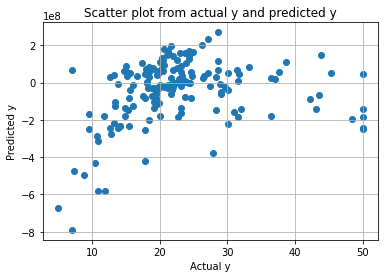

Mean Squared Error : 3.053131749959497e+16


In [5]:
w,b=CustomSGD(train_data,learning_rate=1,n_iter=100,divideby=2,k=10)
y_pred_customsgd=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

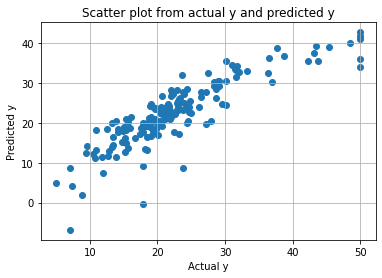

Mean Squared Error : 19.763259269361463


In [6]:
w,b=CustomSGD(train_data,learning_rate=0.001,n_iter=1000,divideby=1,k=10)
y_pred_customsgd_improved=predict(x_test,w,b)

plt.scatter(y_test,y_pred_customsgd_improved)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd_improved))